#### DSCI 100 Project Proposal -- Group 8: Predicting Chest Pain Type

#### Introduction:
Angina, more commonly referred to as chest pain, is the discomfort caused by the lack of oxygen-rich blood in the heart. There are a multitude of factors that have proven to increase the risk of chest pain including age, high blood pressure, smoking, physical inactivity, and more. The purpose of our project is to predict the type of chest pain using various predictor variables. In order to do this, we have chosen the UCI Heart Disease data set, which examines the presence of heart disease in patients. 

#### Methods:
We plan to use the method of classification to predict the type of chest pain (typical angina, atypical angina, non-anginal pain, or asymptomatic). First we will split our data into a training and testing dataset, and then use cross-validation to evaluate different choices of K in the K-nearest neighbors algorithm. For our data analysis we will be predicting the variable of chest pain type, using the columns: age, chest pain type, serum cholesterol, maximum heart rate, and resting blood pressure. For chest pain type, value 1 is typical angina, value 2 is atypical angina, value 3 is non-anginal pain and value 4 is asymptomatic.


First, we will visualize the results using a scatter plot and plot 2 variables, age and cholesterol, with the 4 chest pain types color coordinated. By choosing these two as our initial variables, we can easily draw any trends or patterns from the plot and determine if there are any similarities between each point and its neighboring points. As we add more predictor variables into our classification analysis, we can determine which value of k is most accurate by using cross-validation on our training set and plotting k against accuracy in a cross-validation plot. Lastly, we can use a confusion matrix to report the accuracy of the predictions of our final model on the test dataset.


#### Expected outcomes and significance: 
We expect to find which variables are the most important for chest pain type. Looking at each variable, we expect that the higher the age, blood pressure, cholesterol level, and maximum heart rate should result in a higher level of chest pain. We are predicting that the variables of age and cholesterol levels to be the most accurate predictors in deciding what chest pain level we have.

These findings could impact the health industry concerns with chest pains in important ways. If we know which variables are likely to cause severe chest pain, then patients with this kind of chest pain know to be more cautious of specific things. For example, if we were to find that having a high resting blood pressure likely corresponds to typical angina, patients with this type of chest pain should more closely watch their blood pressure levels.

Some future questions this could lead to include:
* What other factors may affect chest pain?
* Are we able to do this analysis with other pains, such as shoulder pain?
* Could these same variables also link to other health issues in the body?
* Are there any omitted variables in our classification analysis that may be influencing our results?


#### Preliminary exploratory data analysis:

In [29]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)


ERROR: Error in library(themis): there is no package called ‘themis’


In [13]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(url, "data.mod")

In [14]:
# Load our dataset
chest_pain_data <- read_csv("data.mod", col_name = FALSE)
slice(chest_pain_data,1:6)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [15]:
# add colomn names
names(chest_pain_data) <- c("age", "sex",
                         "chest_pain_type",
                         "trest_bps",
                          "cholesterol",
                          "fasting_blood_sugar",
                          "resting_ecg",
                          "max_heart_rate",
                          "exercise_induced_angina",
                          "oldpeak",
                          "slope",
                          "no_vessels_colored",
                          "thal",
                          "healthy")

In [16]:
# convert all categorical variables into a factor using the as_factor() function.
chest_pain_data <- mutate(chest_pain_data, sex = as_factor(sex),
                          chest_pain_type = as_factor(chest_pain_type),
                          fasting_blood_sugar = as_factor(fasting_blood_sugar),
                          resting_ecg = as_factor(resting_ecg),
                          exercise_induced_angina = as_factor(exercise_induced_angina),
                          slope = as_factor(slope),
                          no_vessels_colored = as_factor(no_vessels_colored),
                          thal = as_factor(thal),
                          healthy = as_factor(healthy)
                          )
slice(chest_pain_data,1:6)               

age,sex,chest_pain_type,trest_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_vessels_colored,thal,healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [17]:
## Generate the mean of the predictor variables for each chest pain type
mean_summary <- chest_pain_data_train %>% 
   group_by(chest_pain_type) %>% 
   summarize(mean_age = mean(age, na.rm = TRUE),
             mean_trest_bps = mean(trest_bps, na.rm = TRUE),
             mean_cholesterol = mean(cholesterol, na.rm = TRUE),
             mean_max_heart_rate = mean(max_heart_rate, na.rm = TRUE))

mean_summary

`summarise()` ungrouping output (override with `.groups` argument)



chest_pain_type,mean_age,mean_trest_bps,mean_cholesterol,mean_max_heart_rate
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,55.57143,139.4286,237.1429,156.1905
2,51.89474,129.5263,247.3684,163.3158
3,53.68254,131.0159,248.7619,155.4127
4,55.51402,132.1402,248.8505,140.7850


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



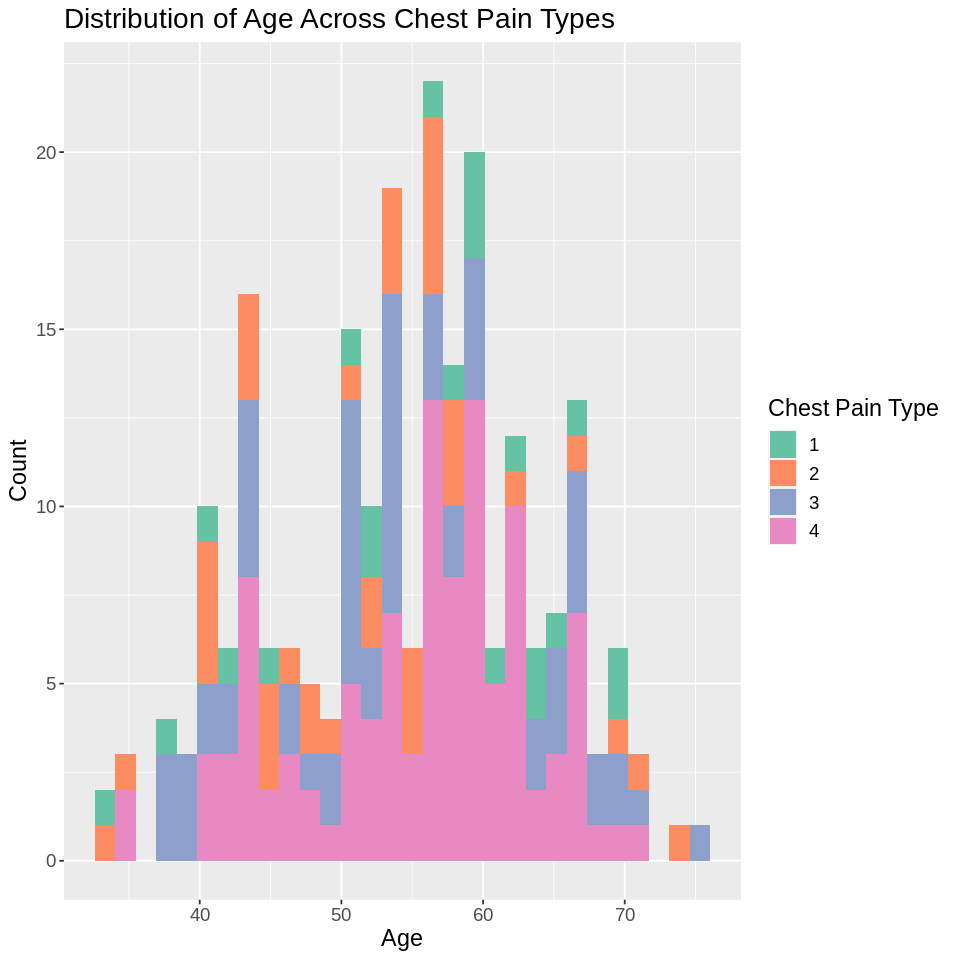

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



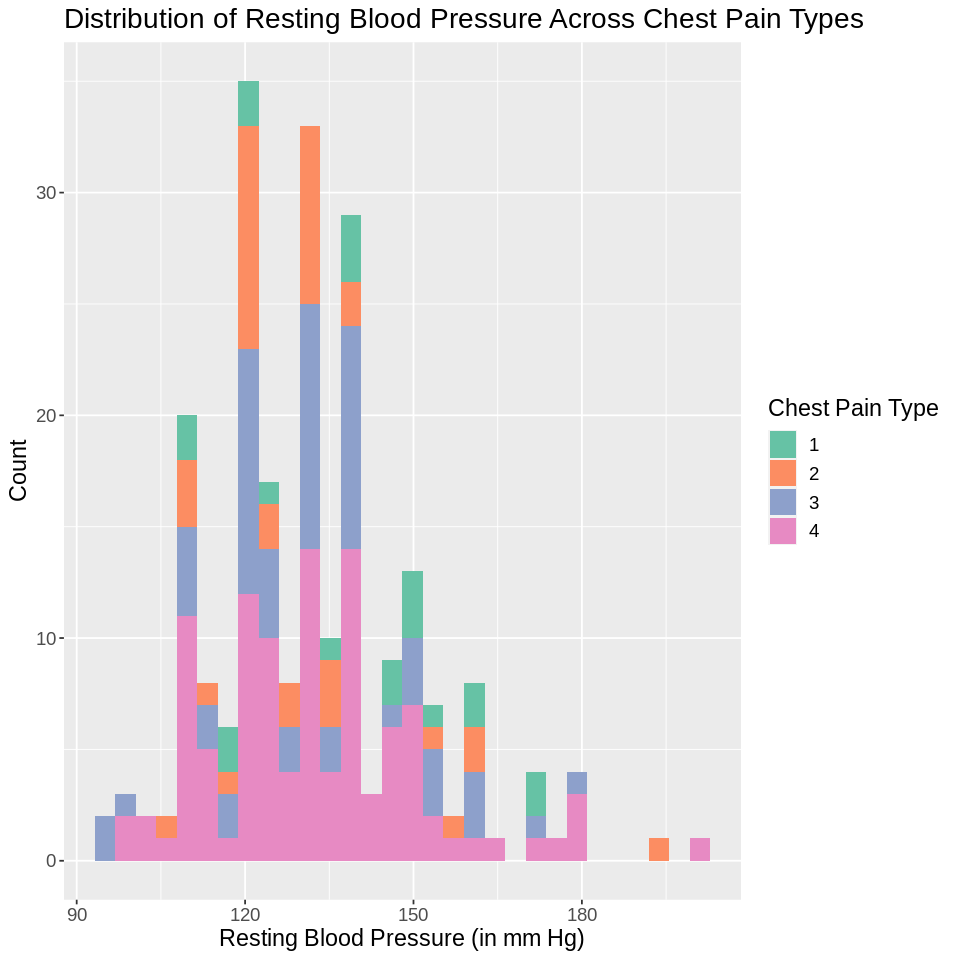

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



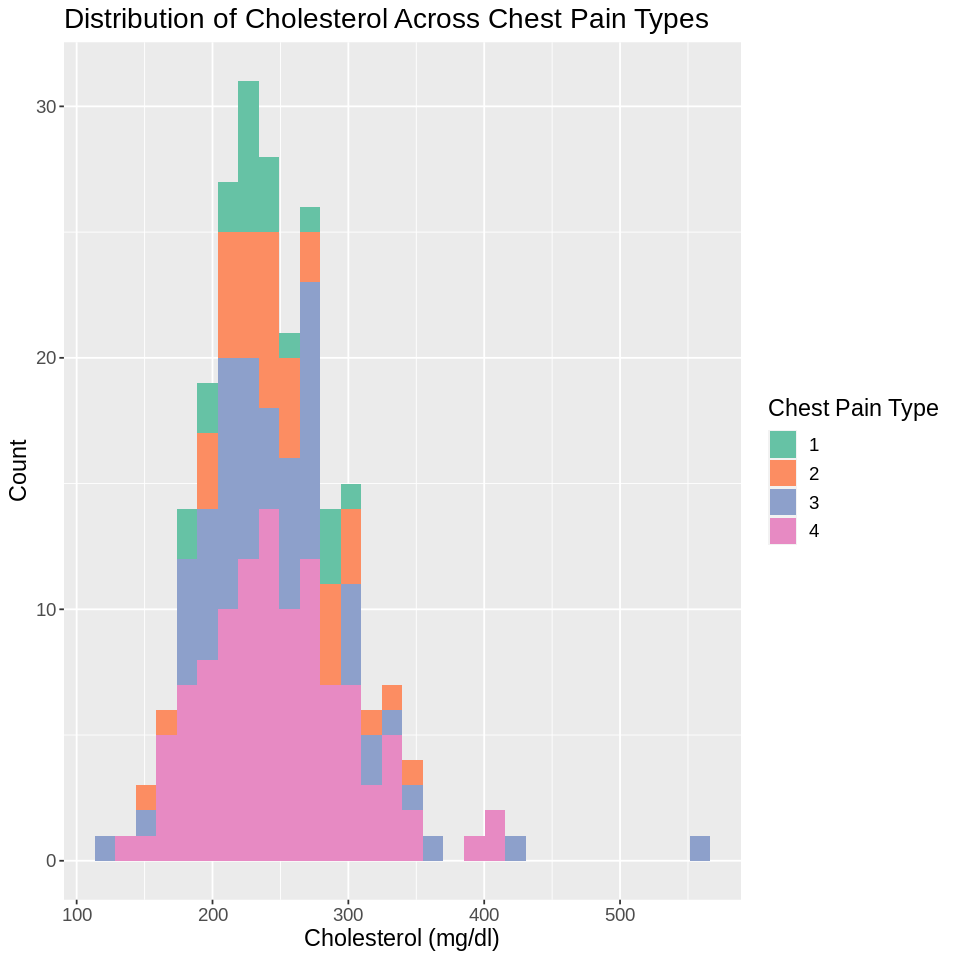

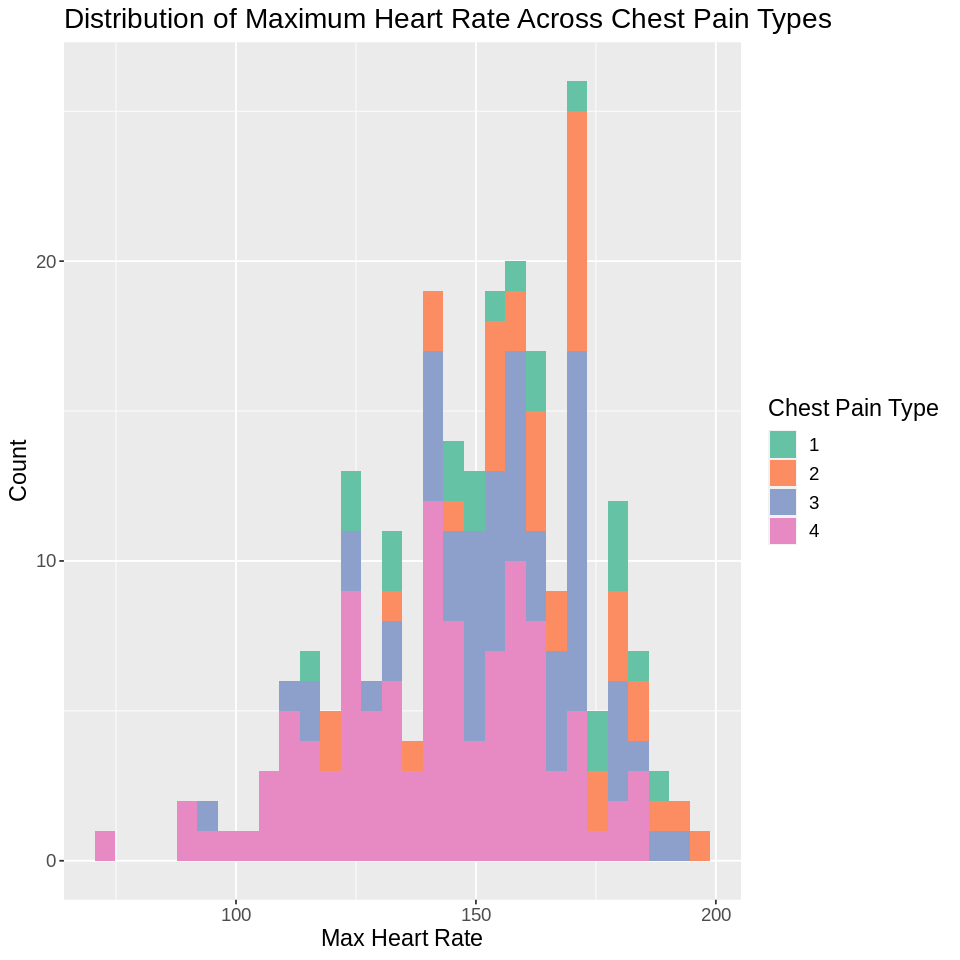

In [18]:
## Histogram for the distribution of each predictor variable

options(repr.plot.width = 8, repr.plot.height = 8)    

cp_histogram_age <- chest_pain_data_train %>%
    ggplot(aes(x = age, fill = chest_pain_type)) +
    geom_histogram() +
    scale_fill_brewer(palette = 'Set2') +
    labs(x="Age", y="Count", fill = "Chest Pain Type") +
    ggtitle("Distribution of Age Across Chest Pain Types") +
    theme(text = element_text(size = 14))
cp_histogram_age

cp_histogram_trest_bps <- chest_pain_data_train %>%
    ggplot(aes(x = trest_bps, fill = chest_pain_type)) +
    geom_histogram() +
    scale_fill_brewer(palette = 'Set2') +
    labs(x="Resting Blood Pressure (in mm Hg)", y="Count", fill = "Chest Pain Type") +
    ggtitle("Distribution of Resting Blood Pressure Across Chest Pain Types") +
    theme(text = element_text(size = 14))
cp_histogram_trest_bps

cp_histogram_trest_cholesterol <- chest_pain_data_train %>%
    ggplot(aes(x = cholesterol, fill = chest_pain_type)) +
    geom_histogram() +
    scale_fill_brewer(palette = 'Set2') +
    labs(x="Cholesterol (mg/dl)", y="Count", fill = "Chest Pain Type") +
    ggtitle("Distribution of Cholesterol Across Chest Pain Types") +
    theme(text = element_text(size = 14))
cp_histogram_trest_cholesterol

cp_histogram_trest_max_heart_rate <- chest_pain_data_train %>%
    ggplot(aes(x = max_heart_rate, fill = chest_pain_type)) +
    geom_histogram() +
    scale_fill_brewer(palette = 'Set2') +
    labs(x="Max Heart Rate", y="Count", fill = "Chest Pain Type") +
    ggtitle("Distribution of Maximum Heart Rate Across Chest Pain Types") +
    theme(text = element_text(size = 14))
cp_histogram_trest_max_heart_rate

In [19]:
# split our dataset into a training dataset and a testing dataset
# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset.

chest_pain_data_split <- initial_split(chest_pain_data, prop = 0.75, strata =chest_pain_type )  
chest_pain_data_train <- training(chest_pain_data_split)   
chest_pain_data_test <- testing(chest_pain_data_split)

slice(chest_pain_data_train,1:6) 
slice(chest_pain_data_test,1:6) 

age,sex,chest_pain_type,trest_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_vessels_colored,thal,healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


age,sex,chest_pain_type,trest_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,no_vessels_colored,thal,healthy
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
50,0,3,120,219,0,0,158,0,1.6,2,0.0,3.0,0
59,1,4,135,234,0,0,161,0,0.5,2,0.0,7.0,0
42,1,4,140,226,0,0,178,0,0.0,1,0.0,3.0,0


In [ ]:
# cross validation
vfold <- vfold_cv(chest_pain_data_train, v=5, strata = chest_pain_type)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.45333333
kap,multiclass,0.09771127


          Truth
Prediction  1  2  3  4
         1  0  0  0  0
         2  2  2  2  5
         3  1  1  6  5
         4  5  8 12 26

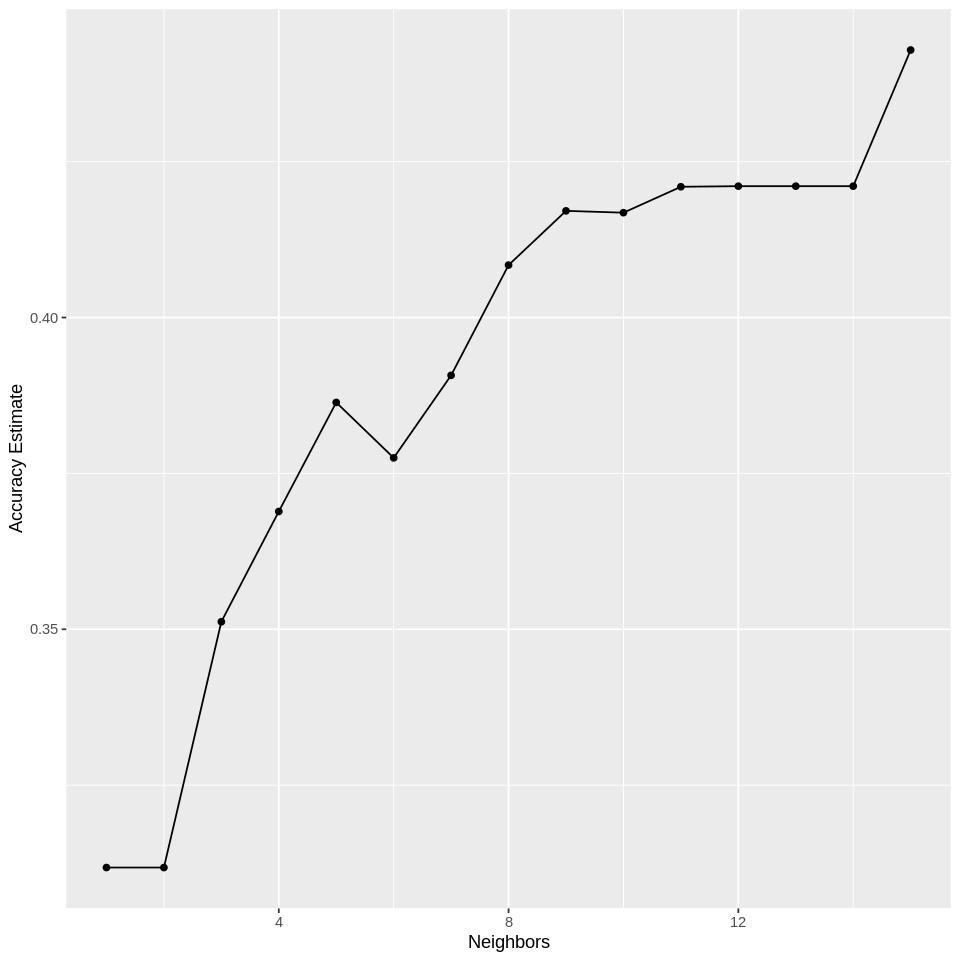

In [44]:
# recipe and standardization
cp_recipe <- recipe(chest_pain_type~age+trest_bps+cholesterol+max_heart_rate, data = chest_pain_data_train) %>%
  #  step_upsample(Class, over_ratio = 1, skip = FALSE) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# workflow
knn_result <- workflow() %>%
    add_recipe(cp_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = vfold, grid = 50) %>%
    collect_metrics()

# accuracy
accuracies <- knn_result %>%
    filter(.metric == "accuracy")

# accuracy plot
cross_val_plot <- accuracies %>%
    ggplot(aes(x=neighbors, y=mean)) +
    geom_point()+
    geom_line() +
    labs(x="Neighbors", y="Accuracy Estimate")
cross_val_plot

# build model with k=12
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# new workflow
fit <- workflow() %>%
    add_recipe(cp_recipe) %>%
    add_model(knn_spec) %>%
    fit(data=chest_pain_data_train)

# predict
cp_predictions <- predict(fit, chest_pain_data_test) %>%
    bind_cols(chest_pain_data_test)

# compute accuracy
metrics <- cp_predictions %>%
    metrics(truth = chest_pain_type, estimate = .pred_class)
metrics

# confusion matrix
confusion <- cp_predictions %>%
    conf_mat(truth = chest_pain_type, estimate = .pred_class)
confusion